In [1]:
%load_ext autoreload
%autoreload 2
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 296 µs (started: 2022-05-03 20:37:24 -06:00)


In [2]:
from NeuralODE import NeuralODE
from NeuralNetwork import NeuralNetwork, read_network_from_sherlock_file
import numpy as np

time: 211 ms (started: 2022-05-03 20:37:31 -06:00)


In [3]:
nn = read_network_from_sherlock_file('networks/tora_tiny_controller.nt')

time: 7.06 ms (started: 2022-05-03 20:38:05 -06:00)


In [19]:
def tora_ode(x, u, w):
    dx0 = x[1]
    dx1 = -x[0] + 0.1 * np.sin(x[2]) + w[0]
    dx2 = x[3]
    dx3 = u[0] - 10.0
    return [dx0, dx1, dx2, dx3]

time: 1.18 ms (started: 2022-05-03 20:43:30 -06:00)


In [28]:
node = NeuralODE(nn, tora_ode, 4, 1, [(-0.01,0.01)])

time: 842 µs (started: 2022-05-03 20:44:01 -06:00)


In [53]:
tpoints, res = node.simulate(150.0, [0.5, 0.4, -0.1, 0.2], 0.01 )

time: 296 ms (started: 2022-05-03 20:45:21 -06:00)


In [54]:
from matplotlib import pyplot as plt

time: 577 µs (started: 2022-05-03 20:45:22 -06:00)


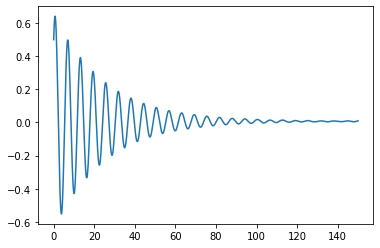

time: 128 ms (started: 2022-05-03 20:45:23 -06:00)


In [55]:
plt.plot(tpoints, [x for [x,_,_,_] in res[:-1]])

In [57]:
state_ranges = [(-1, 1), (-1,1), (-0.5, 0.5), (-0.5, 0.5)]

time: 571 µs (started: 2022-05-03 20:45:50 -06:00)


In [68]:
traces = node.simulate_for_random_initial_conditions(state_ranges,150.0, 0.02, 1000)

time: 2min 2s (started: 2022-05-03 20:50:11 -06:00)


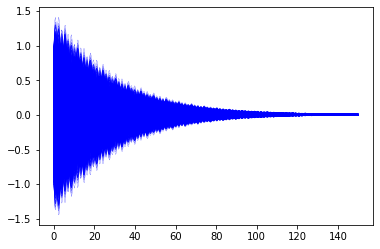

time: 3.55 s (started: 2022-05-03 20:54:49 -06:00)


In [69]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [x,_,_,_] in tr[:-1]],'-b',lw=0.2)


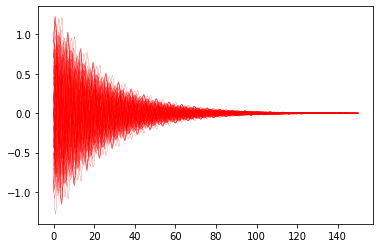

time: 616 ms (started: 2022-05-03 20:47:29 -06:00)


In [61]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [_,x,_,_] in tr[:-1]],'-r',lw=0.2)

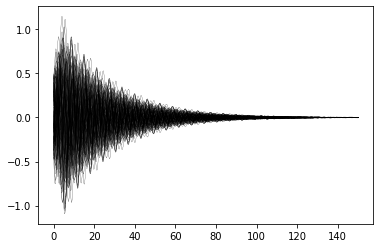

time: 656 ms (started: 2022-05-03 20:48:00 -06:00)


In [64]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [_,_,_,x] in tr[:-1]],'-k',lw=0.2)

In [70]:
stable_ranges= [(-0.1, 0.1), (-0.1, 0.1),(-0.1,0.1),(-0.1,0.1)]
stab_times= [node.get_stabilization_time(time_points, tr, stable_ranges) for (time_points, tr) in traces]
print(stab_times)

[82.22, 93.04, 92.54, 104.12, 67.78, 62.88, 57.04, 88.52, 101.42, 94.10000000000001, 86.44, 91.58, 87.24, 73.7, 96.08, 31.14, 76.44, 85.42, 94.32000000000001, 85.3, 89.76, 87.18, 80.92, 84.58, 108.44, 82.12, 94.96000000000001, 107.52, 89.94, 86.60000000000001, 93.24, 97.76, 96.36, 87.60000000000001, 29.34, 97.44, 76.22, 69.2, 81.04, 77.62, 104.3, 95.34, 90.78, 69.54, 80.36, 92.64, 108.66, 96.38, 78.64, 82.36, 91.98, 102.3, 88.56, 85.76, 83.26, 82.38, 75.3, 82.76, 83.54, 101.02, 94.88, 72.08, 77.46000000000001, 91.04, 69.3, 81.18, 99.84, 80.58, 81.18, 91.92, 86.60000000000001, 78.60000000000001, 84.60000000000001, 98.0, 102.72, 99.94, 96.2, 91.28, 74.34, 98.82000000000001, 82.4, 99.60000000000001, 88.72, 77.88, 88.26, 103.68, 93.18, 74.66, 99.66, 81.68, 105.58, 87.34, 107.36, 83.74, 57.1, 100.98, 80.68, 105.52, 99.02, 101.5, 87.56, 82.72, 98.3, 92.3, 89.4, 71.64, 98.22, 91.92, 38.36, 89.84, 95.54, 92.96000000000001, 90.8, 100.8, 97.12, 49.620000000000005, 82.48, 70.54, 49.80000000000000

(array([  2.,   0.,   1.,   5.,   2.,   5.,   7.,   7.,   5.,   9.,  15.,
         14.,  22.,  39.,  37.,  42.,  64.,  81.,  93., 112., 155., 114.,
        108.,  34.,  27.]),
 array([ 17.28  ,  21.0096,  24.7392,  28.4688,  32.1984,  35.928 ,
         39.6576,  43.3872,  47.1168,  50.8464,  54.576 ,  58.3056,
         62.0352,  65.7648,  69.4944,  73.224 ,  76.9536,  80.6832,
         84.4128,  88.1424,  91.872 ,  95.6016,  99.3312, 103.0608,
        106.7904, 110.52  ]),
 <BarContainer object of 25 artists>)

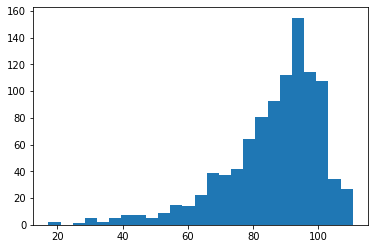

time: 158 ms (started: 2022-05-03 20:55:19 -06:00)


In [72]:
plt.hist(stab_times,bins=25)

In [74]:
timings = []
f = open('tora-timings-10k.txt','r')
for line in f:
    timings.append(float(line))
f.close()

time: 12.3 ms (started: 2022-05-03 21:56:34 -06:00)


(array([   7.,   15.,    6.,    2.,    7.,    9.,    7.,    7.,    7.,
          11.,   20.,   20.,   23.,   27.,   29.,   51.,   44.,   68.,
          91.,  116.,  125.,  189.,  199.,  227.,  279.,  305.,  401.,
         502.,  602.,  726.,  805.,  964., 1076., 1106.,  867.,  717.,
         378.,  151.,   56.,    8.]),
 array([  0.36  ,   3.2155,   6.071 ,   8.9265,  11.782 ,  14.6375,
         17.493 ,  20.3485,  23.204 ,  26.0595,  28.915 ,  31.7705,
         34.626 ,  37.4815,  40.337 ,  43.1925,  46.048 ,  48.9035,
         51.759 ,  54.6145,  57.47  ,  60.3255,  63.181 ,  66.0365,
         68.892 ,  71.7475,  74.603 ,  77.4585,  80.314 ,  83.1695,
         86.025 ,  88.8805,  91.736 ,  94.5915,  97.447 , 100.3025,
        103.158 , 106.0135, 108.869 , 111.7245, 114.58  ]),
 <BarContainer object of 40 artists>)

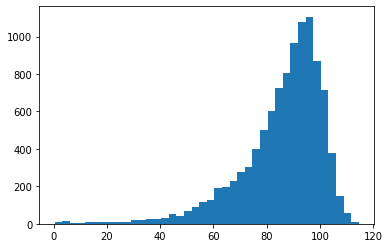

time: 201 ms (started: 2022-05-03 21:57:02 -06:00)


In [76]:
plt.hist(timings, bins=40)